<a href="https://colab.research.google.com/github/ayaelsayed25/Data-Classification-ML/blob/main/Data_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Balancing**

Read Data

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving magic04.data to magic04.data


In [ ]:
import pandas as pd
from collections import Counter
df = pd.read_csv(io.StringIO(uploaded['magic04.data'].decode('utf-8')))

Check if there is null values and add features labels

In [ ]:
df.columns = ['Length', 'Width', 'Size', 'Conc', 'Conc1', 'Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist', 'class']
df = df.fillna(df.mean())

Replace output labels from h,g to 0,1

In [ ]:
df = df.replace({'class':{'g': 1, 'h': 0}})

Function to separate data into dataframes with and without output column

In [ ]:
def separate_data(df):
  x = df
  y = df['class']
  x.drop('class',axis=1,inplace=True)
  return x, y

In [ ]:
x, y = separate_data(df)

Balancing dataset with undersampling function 

In [ ]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [ ]:
x_resampled['class'] = y_resampled
df = x_resampled

In [ ]:
x, y = separate_data(df)

# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
print(len(x_train.columns))

10


# **Classification**

**Function to evaluate the models**

In [ ]:
def evaluation(predicted , y_test):
    from sklearn.metrics import accuracy_score, f1_score
    accuracy = accuracy_score(predicted , y_test)
    f1 = f1_score(predicted , y_test , average='weighted')
    print ("Accuracy: " ,accuracy)
    print("F1_score: ",f1)

    #calculating precision and reall

    from sklearn.metrics import precision_score , recall_score
    precision = precision_score(predicted , y_test )
    recall = recall_score(predicted , y_test ) 
    print('Precision: ',precision)
    print('Recall: ',recall)
    
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(predicted,y_test)
    print("Confusion Matrix:")
    print(confusion)

# **Model Parameter Tuning**

In [ ]:
#function input is the training data , model , params to tunes  return the best model after tunning
# Import 'make_scorer', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def fit_model(X, y , model , params):    
    # Create cross-validation sets from the training data
    cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.3, train_size=None)
  

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(accuracy_score)
    #Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=model, param_grid= params, scoring=scoring_fnc,cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    scores = grid.cv_results_.get('mean_test_score')
    for i in params :      
        plt.scatter(x = params[i] ,y = scores)
        plt.show()
    # Return the optimal model after fitting the data
    return grid.best_estimator_

**Decision Tree**

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
#testing
predicted = tree_model.predict(x_test)
#evaluating
evaluation(predicted ,y_test)

**AdaBoost**

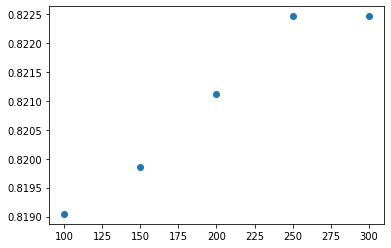

the best n_estimators : 250
Accuracy:  0.8293047595315226
F1_score:  0.8293516135837121
Precision:  0.8428571428571429
Recall:  0.8237843042850265
Confusion Matrix:
[[1617  319]
 [ 366 1711]]


In [ ]:
#Ada Boost 
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

space = np.arange(100,350,50)

#  Create a dictionary for the parameter 'n_estimators' with a range from 10 to 100
params = {'n_estimators':space}

#call gradient decent function to split the data into kfolds and tune the giving params
best_model = fit_model(x_train,y_train, model ,params)
print("the best n_estimators :" , best_model.get_params()['n_estimators'])
#Predict the response for test dataset
predicted = best_model.predict(x_test)

#evaluating
evaluation(predicted ,y_test)



**K-Nearest Neighbors**

entering


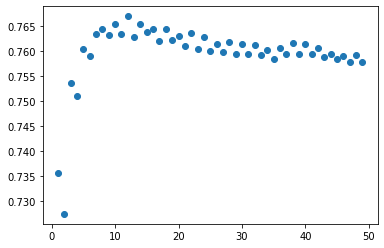

the best k param : 12
Accuracy:  0.7744829304759532
F1_score:  0.775111094634183
Precision:  0.8271051320378675
Recall:  0.7484220018034266
Confusion Matrix:
[[1448  347]
 [ 558 1660]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=range(1,50)
params = {'n_neighbors':k}
model = KNeighborsClassifier()
best_model = fit_model(x_train,y_train, model ,params)
print("the best k param :" , best_model.get_params()['n_neighbors'])

#Predict the response for test dataset
predicted = best_model.predict(x_test)

#evaluating
evaluation(predicted ,y_test)

**Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# n_est=[int(x) for x in np.linspace(10,80,10)]
n_est=[int(x) for x in np.linspace(10,400,10)]
# the best n_estimators : 360
# Accuracy:  0.855968103663095
# F1_score:  0.8560918413593849
# Precision:  0.8816568047337278
# Recall:  0.8410159924741298
# Confusion Matrix:
# [[1647  240]
#  [ 338 1788]]

params = {'n_estimators':n_est}

model = RandomForestClassifier()
best_model = fit_model(x_train,y_train, model ,params)
print("the best n_estimators :" , best_model.get_params()['n_estimators'])

#Predict the response for test dataset
predicted = best_model.predict(x_test)

#evaluating
evaluation(predicted ,y_test)

**Naıve Bayes**



In [ ]:
#Naive bayes
#training
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

#testing
predicted = model.predict(x_test)

#evaluating
evaluation(predicted ,y_test)

# **Bonus**

**Dataset Class**

In [ ]:
dataframe = x
print(dataframe.shape)
dataframe['class'] = y

In [ ]:
import torch
import numpy as np
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels = df['class'].values.tolist()
        self.features = df.drop(columns=['class'], axis=1).values.tolist()

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_features(self, idx):
        return np.array(self.features[idx])

    def __getitem__(self, idx):
        batch_features = self.get_batch_features(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_features, batch_y

**Create Optuna session for hyperparameter tuning**

In [ ]:
!pip install optuna
import optuna
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
#maximize direction tends to increase the accuracy, F1 score, etc.
#TPESampler : Bayesian hyperparameter optimization method

**Full Neural Network Model**

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
def build_model(params):
    
    in_features = 10
    num_classes = 2 #g or h
    return nn.Sequential(
    
        nn.Linear(in_features, params['n_unit_1']),
        nn.LeakyReLU(),
        nn.Linear(params['n_unit_1'], params['n_unit_2']),
        nn.LeakyReLU(),
        nn.Linear(params['n_unit_2'], num_classes),
        nn.LeakyReLU()
        
    )

**Define the number of epochs and batch size**

In [ ]:
EPOCHS = 700
BATCh_SIZE = 635
model = None

**Download the model**

In [ ]:
MODEL_PATH = 'model.pth'
model = torch.load(MODEL_PATH, map_location=torch.device('cpu'))

**Training and evaluation of the model**

In [ ]:
def train_and_evaluate(param):
    global model
    train_data, val_data = train_test_split(dataframe, test_size = 0.2, random_state = 42)
    train, val = Dataset(train_data), Dataset(val_data)
    train_dataloader = torch.utils.data.DataLoader(train, batch_size=BATCh_SIZE, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=BATCh_SIZE)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = getattr(optim, param['optimizer'])(model.parameters(), lr= param['learning_rate'])

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(EPOCHS):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in train_dataloader:

                train_label = train_label.to(device)
                train_input = train_input.to(device)

                output = model(train_input.float())
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    val_input = val_input.to(device)

                    output = model(val_input.float())

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            accuracy = total_acc_val/len(val_data)

    return accuracy

**Objective function for optuna session**: contains the parameters to be tunes, the neural network model, and the accuracy of the model which results from the training and evaluation

In [ ]:
def objective(trial):
    global model
    #parameters we want to tune:
    params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1), 
              'optimizer': "Adam",
              'n_unit_1': trial.suggest_int("n_unit_1", 4, 21), #number of units in the first hidden layer : ranges(4, 18)
              'n_unit_2': trial.suggest_int("n_unit_2", 4, 21) #number of units in the second hidden layer : ranges(4, 18),
              }
    
    model = build_model(params)
    
    accuracy = train_and_evaluate(params)

    return accuracy

**Start the session**

In [ ]:
study.optimize(objective, n_trials=10)

**Show Best Trial**

In [ ]:
print("Accuracy for best trial : ", study.best_trial.value, "best no. of units for 1st layer = " , study.best_trial.params['n_unit_1'] , " for 2nd layer = " , study.best_trial.params['n_unit_2'], " learning rate = ", study.best_trial.params['learning_rate'])

Accuracy for best trial :  0.8371596369460759 best no. of units for 1st layer =  12  for 2nd layer =  10  learning rate =  0.08091890898502657


**Store the model**

In [ ]:
MODEL_PATH = 'model.pth'
torch.save(model, MODEL_PATH)